In [3]:
import matplotlib.pyplot as plt

from pydantic import BaseModel, computed_field

In [24]:
class Data(BaseModel):
    revenues:            dict[str, int]
    eps:                 dict[str, float]
    operating_cash_flow: dict[str, int]
    capex:               dict[str, int]

    
    def _pct_change(self, current: int, previous: int) -> float:
        return ((current - previous) / previous) * 100

    def _compute_all_yoy(self, data: dict[str, int]) -> dict[str, float]:
        years = sorted(data.keys(), reverse=True)
        return {
            years[i]: self._pct_change(data[years[i]], data[years[i+1]])
            for i in range(len(years) - 1)
        }


    @computed_field
    @property
    def fcf(self) -> dict[str, int]:
        return {
            year: self.operating_cash_flow[year] + self.capex[year]
            for year in self.revenues.keys()
        }

    @computed_field
    @property
    def revenues_yoy(self) -> dict[str, float]:
        return self._compute_all_yoy(self.revenues)
    
    @computed_field
    @property
    def eps_yoy(self) -> dict[str, float]:
        return self._compute_all_yoy(self.eps)
    
    @computed_field
    @property
    def operating_cash_flow_yoy(self) -> dict[str, float]:
        return self._compute_all_yoy(self.operating_cash_flow)
    
    @computed_field
    @property
    def capex_yoy(self) -> dict[str, float]:
        return self._compute_all_yoy(self.capex)
    
    @computed_field
    @property
    def fcf_yoy(self) -> dict[str, float]:
        return self._compute_all_yoy(self.fcf)
    
    def plot_yoy_changes(self):    
        fig, axes = plt.subplots(3, 1, figsize=(10, 8))

        print(f'YoY revenue: {[round(v, 2) for v in self.revenues_yoy.values()]}')
        print(f'YoY EPS: {[round(v, 2) for v in self.eps_yoy.values()]}')
        print(f'YoY FCF: {[round(v, 2) for v in self.fcf_yoy.values()]}')
        
        # Revenue YoY.
        years = list(self.revenues_yoy.keys())
        values = list(self.revenues_yoy.values())
        axes[0].bar(years, values, color='steelblue')
        axes[0].set_title('Revenue YoY Growth (%)')
        axes[0].set_ylabel('% Change')
        axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[0].grid(axis='y', alpha=0.3)
        
        # EPS YoY.
        years = list(self.eps_yoy.keys())
        values = list(self.eps_yoy.values())
        axes[1].bar(years, values, color='green')
        axes[1].set_title('EPS YoY Growth (%)')
        axes[1].set_ylabel('% Change')
        axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[1].grid(axis='y', alpha=0.3)
        
        # FCF YoY.
        years = list(self.fcf_yoy.keys())
        values = list(self.fcf_yoy.values())
        axes[2].bar(years, values, color='orange')
        axes[2].set_title('Free Cash Flow YoY Growth (%)')
        axes[2].set_ylabel('% Change')
        axes[2].set_xlabel('Year')
        axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[2].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

In [25]:
"""
Free Cash Flow = Operating Cash Flow - Capital Expenditures
From the statement:
- Cash provided by operating activities
- Additions to property and equipment

"Additions to property and equipment" are under CASH FLOWS FROM INVESTING ACTIVITIES.
In Yahoo Finance, CapEx shows as net ppe (Property, Plant, & Equipment) purchase and sale,
which is under Investing Cash Flow.
"""
data = Data(
    revenues = {
        '2025': 275_235,
        '2024': 254_453,
        '2023': 242_290,
        '2022': 226_954,
    },
    eps = {
        '2025': 18.21,
        '2024': 16.56,
        '2023': 14.16,
        '2022': 13.14,
    },
    operating_cash_flow = {
        '2025': 13_335,
        '2024': 11_339,
        '2023': 11_068,
        '2022': 7_392,
    },
    capex = {
        '2025': -5_498,
        '2024': -4_710,
        '2023': -4_323,
        '2022': -3_891,
    }
)

In [26]:
data.fcf

{'2025': 7837, '2024': 6629, '2023': 6745, '2022': 3501}

YoY revenue: [8.17, 5.02, 6.76]
YoY EPS: [9.96, 16.95, 7.76]
YoY FCF: [18.22, -1.72, 92.66]


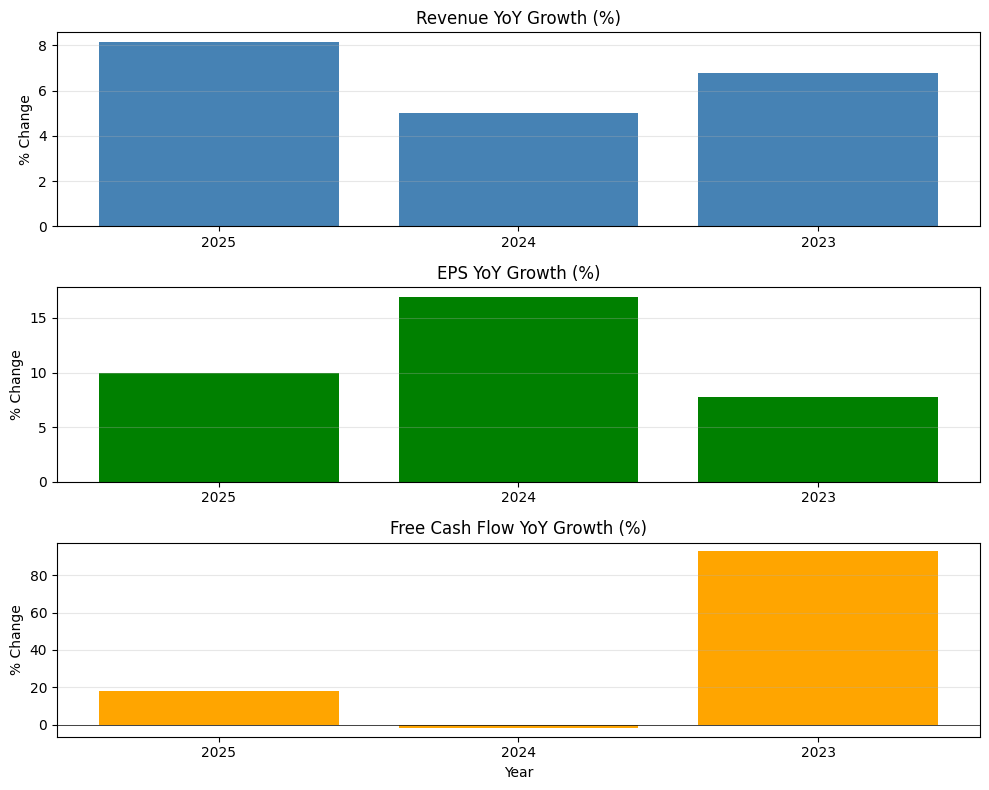

In [27]:
data.plot_yoy_changes()